In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer

In [3]:
# Import dataset
df = pd.read_csv("housing.csv")

# Check Dataset

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The dataset consists of 9 features + 1 target (median_house_value):
Longitude: geographic coordinate that specifies the east–west position of the block
Latitude: geographic coordinate that specifies the north–south position of the block
housingMedianAge: Median age of houses in a block
totalRooms: Total number of rooms within a block
totalBedrooms: Total number of bedrooms within a block
population: Total number of people residing within a block
households: Total number of households for a block
medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
medianHouseValue: Median house value for households within a block (measured in US Dollars) --> TARGET
oceanProximity: distance from the ocean the ocean the ocean

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


__This dataset contains 9 numerical feature and 1 object__

In [6]:
df.shape

(20640, 10)

In [7]:
df.size

206400

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


# Check Data & Datatypes

In [57]:
# Check values of "Ocean_proximity"
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [58]:
# Checking NaN Values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [68]:
# Searchin for those rows with NaN 'total_bedrooms'
df[(df['total_bedrooms'].isnull())]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,92100.0,<1H OCEAN
19952,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20088,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,138800.0,INLAND
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN


In [70]:
# Filling missing values of total_bedrooms
imputer = SimpleImputer(strategy='mean')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [59]:
# Check Duplicate Values
df.duplicated().sum()

0

In [81]:
# Checking the mean,median, count of features based on "ocean_proximity"
df.groupby("ocean_proximity")[['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_house_value']].agg(['count', 'mean', 'median'])

housing_median_age                   total_rooms               \
                             count       mean median       count         mean   
ocean_proximity                                                                 
<1H OCEAN                     9136  29.279225   30.0        9136  2628.343586   
INLAND                        6551  24.271867   23.0        6551  2717.742787   
ISLAND                           5  42.400000   52.0           5  1574.600000   
NEAR BAY                      2290  37.730131   39.0        2290  2493.589520   
NEAR OCEAN                    2658  29.347254   29.0        2658  2583.700903   

                        total_bedrooms                    median_house_value  \
                 median          count        mean median              count   
ocean_proximity                                                                
<1H OCEAN        2108.0           9136  546.442403  442.0               9136   
INLAND           2131.0           6551  533.915109  426.0               6551   
ISLAND           1675.0              5  420.400000  512.0                  5   
NEAR BAY         2083.0           2290  514.389699  425.5               2290   
NEAR OCEAN       2195.0           2658  538.607267  468.0               2658   

                                          
                          mean    median  
ocean_proximity                           
<1H OCEAN        240084.285464  214850.0  
INLAND           124805.392001  108500.0  
ISLAND           380440.000000  414700.0  
NEAR BAY         259212.311790  233800.0  
NEAR OCEAN       249433.977427  229450.0

# Check Distribution

In [72]:
def distribution(col):
    plt.figure(figsize=(12, 6))
    plt.hist(df[col], bins=150, color='red', rwidth=0.8, edgecolor='black')
    plt.title(f"Distribuition of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show()

In [73]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

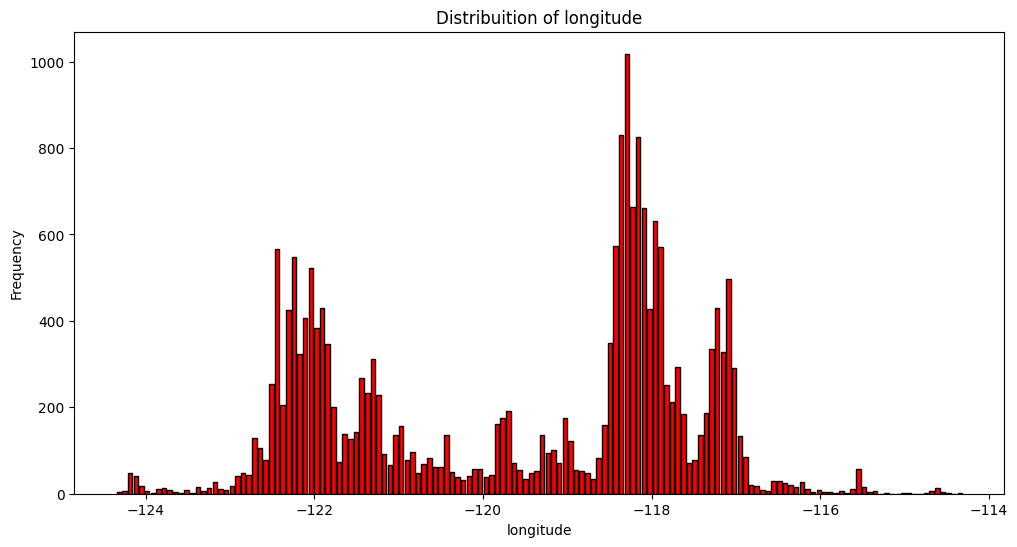

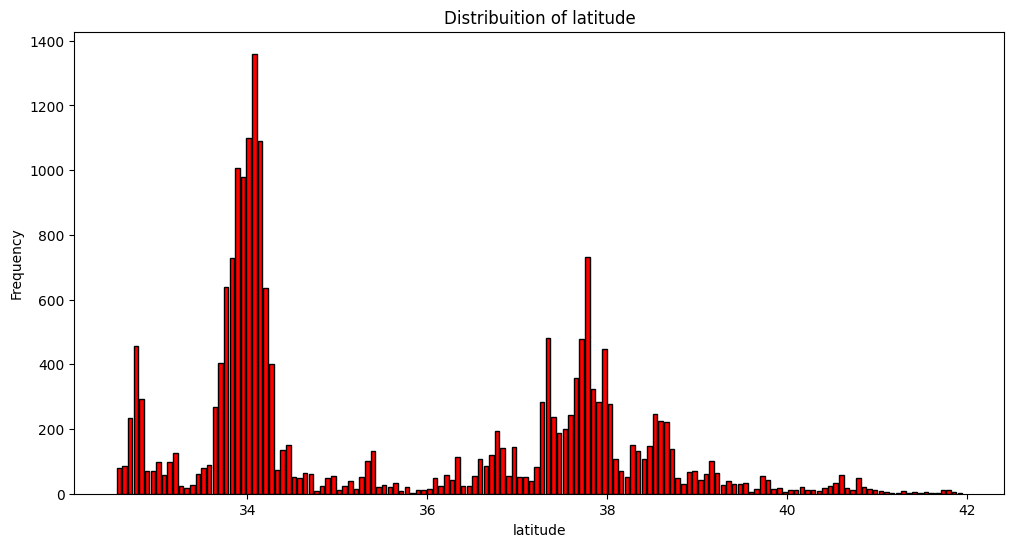

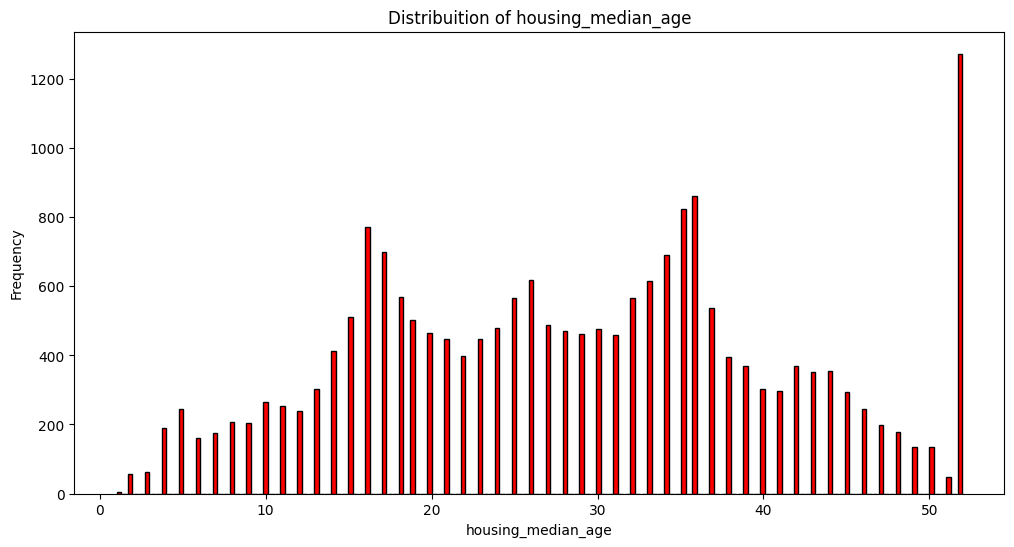

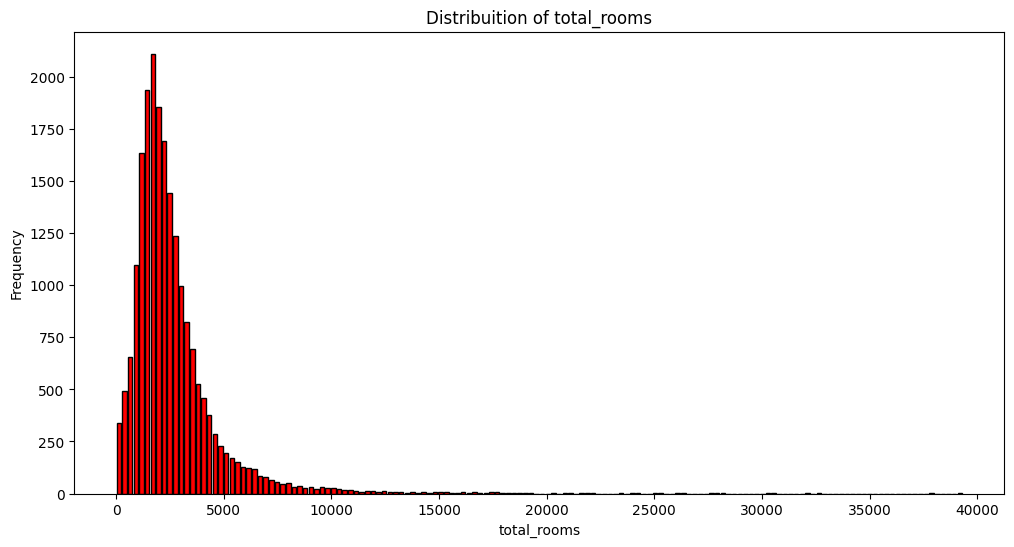

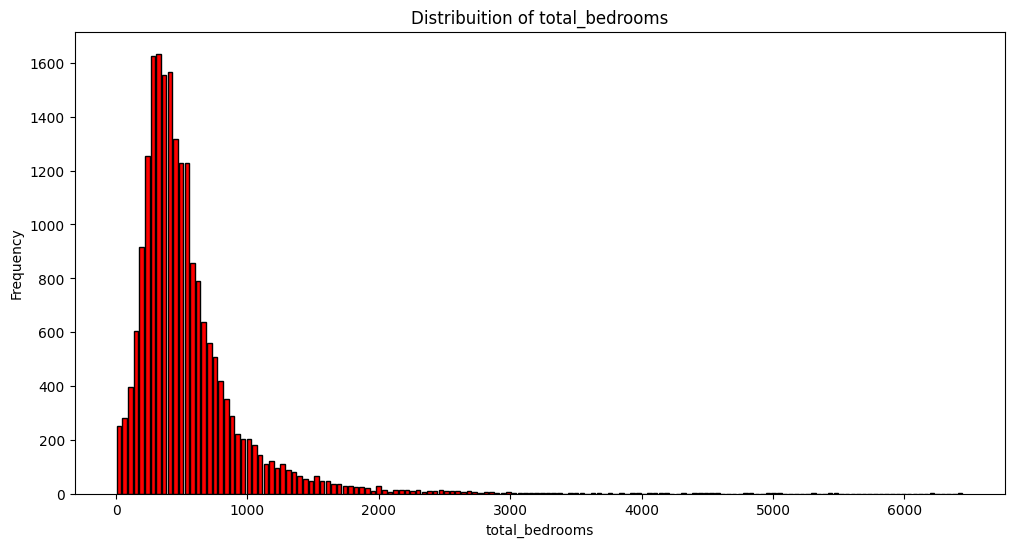

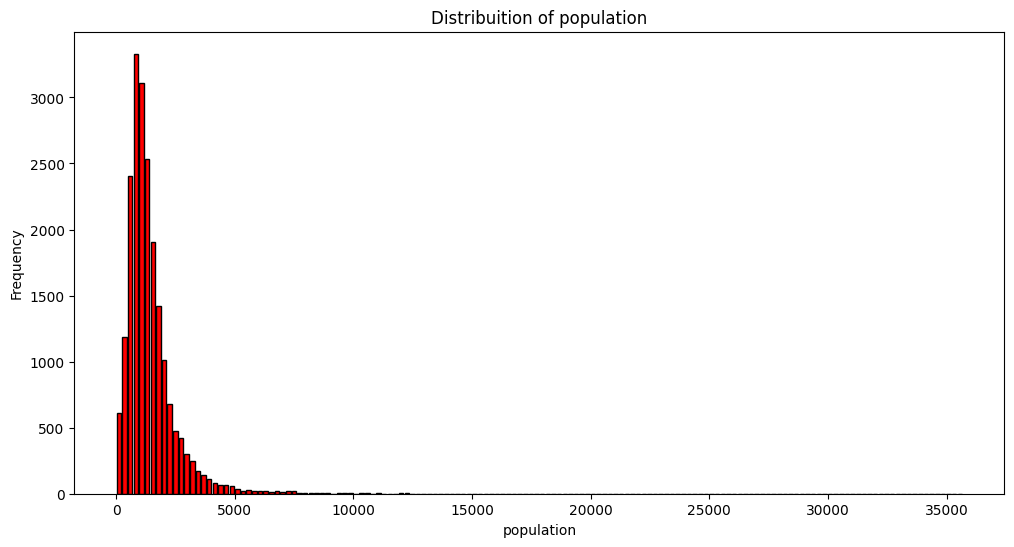

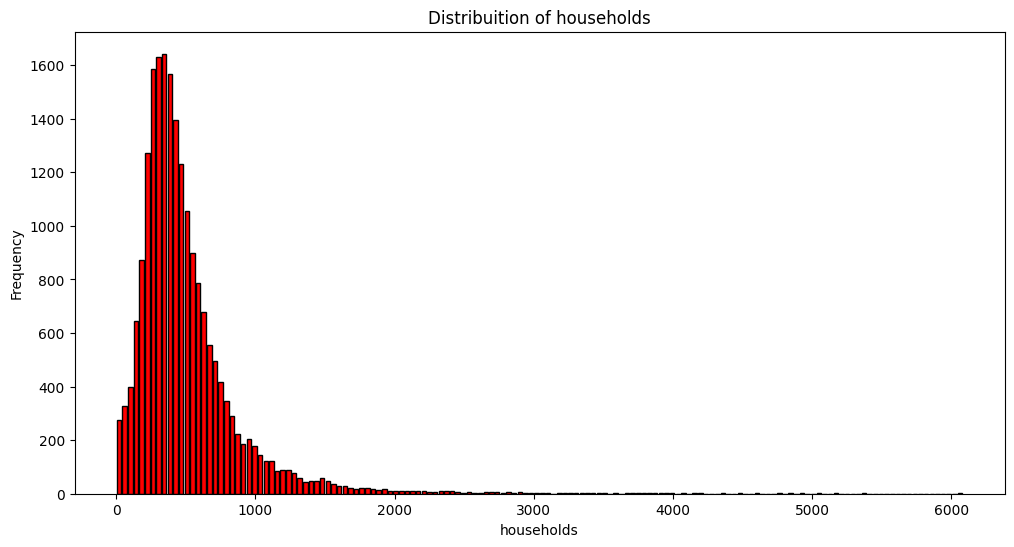

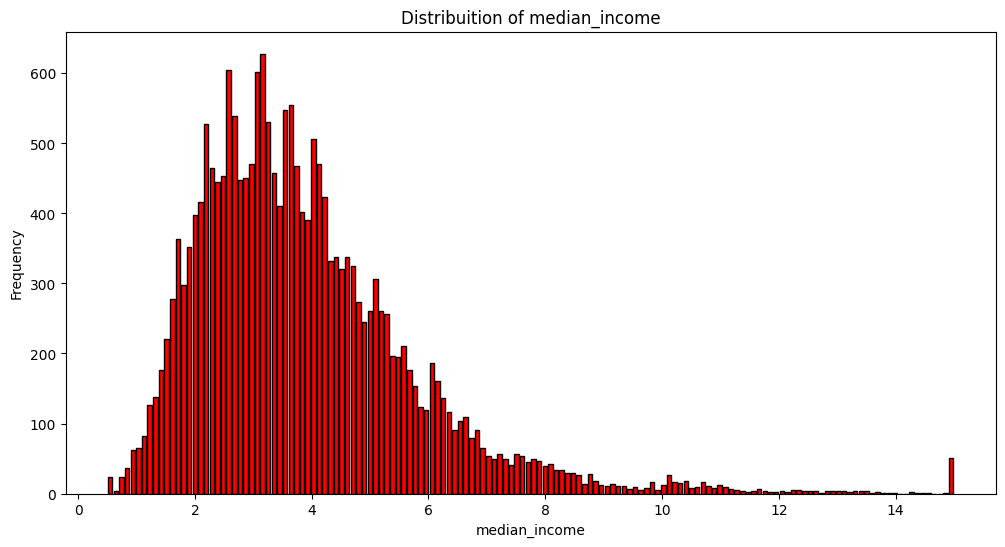

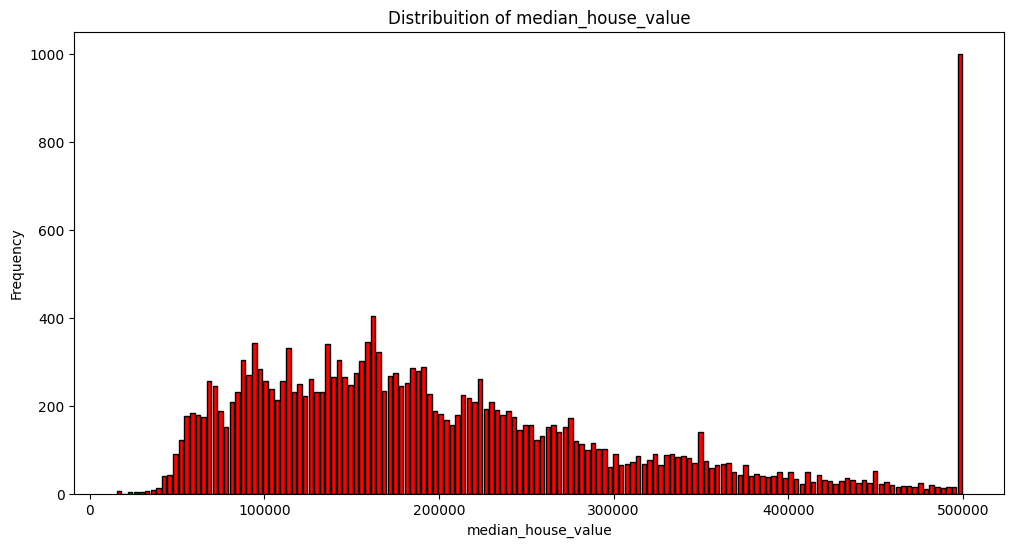

In [74]:
for col in columns:
    distribution(col)

# House Prices Per "ocean_proximity"

In [ ]:
# def house_price(col, cat):
#     plt.figure(figsize=(12, 6))
#     plt.plot(df[col], )